# Определение факторов перспективного развития рынка продаж видеоигр

## Описание проекта


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

***Цель исследования*** - определение факторов, влияющих на перспективное развитие рынка продаж видеоигр для планирования стратегии развития: определение популярного продукта, развитие менее популярных продуктов, планирование бюджета рекламных компаний.

***Задачи исследования***:

1. Изучение рынка видеоигр в разрезе платформ, объема продаж;
2. Определение факторов, влияющих на рост или падение продаж видеоигр;
3. Разработка рекомендаций для руководства компании с учетом полученных данных.

***Описание данных*** 

Name — название игры 

Platform — платформа 

Year_of_Release — год выпуска 

Genre — жанр игры 

NA_sales — продажи в Северной Америке (миллионы проданных копий) 

EU_sales — продажи в Европе (миллионы проданных копий) 

JP_sales — продажи в Японии (миллионы проданных копий) 

Other_sales — продажи в других странах (миллионы проданных копий) 

Critic_Score — оценка критиков (максимум 100) 

User_Score — оценка пользователей (максимум 10) 

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

Данные за 2016 год могут быть неполными. 

## Изучение данных из файла

Для того, чтобы понять, какие данные необходимо исследовать, необходимо открыть файлы и понять, что там содержится.

In [1]:
#подключаем все необходимые пакеты

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
#открываем датасет

data = pd.read_csv('/datasets/games.csv', sep = ',')

#выводим первые 10 строк датасета на экран 

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#просмотрим общую информацию о датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Поскольку название столбцов не отличается правилами хорошего стиля, переведем их в соответствие с учетом змеиного регистра.

In [4]:
#приводим название столбцов к змеиному регистру

data = data.rename(columns=lambda x:x.lower())

#выведем первые 10 строк датасета для проверки

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод

Информация о датасете предварительно изучена, названия столбцов приведены к нижнему регистру. Можно переходить на этап предобработки данных.

## Предобработка данных

### Поиск пропусков и дубликатов. Изменение типов данных

In [5]:
#объявим функцию для поиска и оценки количества и доли пропусков и дубликатов

def data_isna(data): #объявляем функцию data_isna
    print(f'Количество пропусков:{data.isna().sum()}') #с помощью методов isna() и sum() посчитаем количество пропусков
    print(f'Доля пропусков:{data.isna().sum()*100/len(data)}') #с помощью методов isna(),sum() и количества строк посчитаем долю пропусков
    print(f'Количество дубликатов:{data.duplicated().sum()}') #посчитаем количество дубликатов
    print(f'Доля дубликатов:{data.duplicated().sum()*100/len(data)}') #посчитаем долю дубликатов

#изучим количество пропусков и дубликатов в датасете 

data_isna(data)

Количество пропусков:name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
Доля пропусков:name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


Из представленных данных видно, что в столбцах как с категориальными, так и с количественными значениями пристутствуют пропуски. Прияины возникновения пропусков могут быть различные (некорректная выгрузка данных, намеренное непредоставление или отсутствие данных и др.).

In [6]:
#изучим пропуски в столбце 'name'

data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим, в столбце 'name' всего два пропущенных значения. Пропуски могли возникнуть из-за любых причин, например, технологических (при выгрузке данных), из-за человеческого фактора (просто забыли указать наименование игры). В любом случае, можно удалить эти пропуски без опасения за искажение результатов исследования.

In [7]:
#удалим пропуски в столбце 'name'

data = data.dropna(subset=['name']).reset_index(drop=True)

In [8]:
#проверим удалены ли пропуски

data['name'].isna().sum()

0

In [9]:
#изучим пропуски в столбце 'year_of_release'

data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Из представленных данных видно, что пропуски в столбце 'year_of_release' составляют более одного процента и могут повлиять на результаты исследования. Чтобы избежать это, заменим пропущенные значения медианным значением, поскольку это самое простое и понятное решение.

In [10]:
# Комментарий ревьюера
# Эта игра выходила в разные года на одной платформе
data.query('name == "Need for Speed: Most Wanted"') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3580,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [11]:
#проверим количество пропусков в столбце 'year_of_release'

data['year_of_release'].isna().sum()

269

По каким-то причинам у нас осталось 146 пропущенных значений в столбце с данными о годе выпуска игр. Поскольку это совсем немного, удалим эти значения.

In [12]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [13]:
#проверим есть ли пропуски в столбце 'year_of_release'

data['year_of_release'].isna().sum()

0

In [14]:
#переведем данные о годе выпуска игр в целочисленный формат

data['year_of_release'] = data['year_of_release'].astype('int')

In [15]:
#проверим изменился ли формат данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [16]:
#изучим пропуски в столбце 'critic_score'

data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
#изучим пропуски в столбце 'user_score'

data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Изучив данные в столбцах с оценками пользователей и критиков, мы видим, что в них есть большое количество пропущенных значений. Вероятнее всего, на некоторые игры просто не были проставлены оценки со стороны пользователей и критиков. Поскольку мы не можем как-то хотя бы приблизительно оценить какими значениями заполнить пропуски в этих столбцах, заменим пропущенные значения нулями.

In [18]:
#изучим часть встречающиеся значения в столбце 'user_score'

data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
2.3       2
0.5       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В столбце с оценками пользователей чаще всего попадается значений 'tbd' (to be defined), что по сути означает то, что значения не определены. Заменим эти значений на NaN.

In [19]:
#заменяем значения 'tbd' на NaN

data = data.replace('tbd', np.nan)

In [20]:
#проверим заменены ли значения

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [21]:
#заменим пропущенные значения в столбцах 'critic_score' и 'user_score' нулевыми значениями

data = data.fillna({'critic_score': 0,
        'user_score': 0})

#посмотрим остались ли пропуски

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [22]:
#приведем данные в столбце 'user_score' к вещественному типу

data['user_score'] = data['user_score'].astype('float')

#проверим изменилмя ли тип данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [23]:
#изучим пропуски в столбце 'rating'

data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN


В столбце 'rating' содержится большое количество пропусков - 6699 строк. Вероятнее всего, рейтинг просто не был проставлен. Поскольку мы не можем предположить, какими значениями заполнить пропуски в данном столбце, а также учитывая то, что они являются категориальными значениями, заменим пропуски значением 'unknown'.

In [24]:
#заменим пропуски в столбце 'rating' значением 'unknown'

data['rating'] = data['rating'].fillna('unknown')

#проверим значения столбца 'rating'

data['rating'].head(10)

0          E
1    unknown
2          E
3          E
4    unknown
5    unknown
6          E
7          E
8          E
9    unknown
Name: rating, dtype: object

In [25]:
#проверим наличие пропусков в датасете

data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Для проведения исследования нам необходимо добавить данные о суммарных продажах игры в датасет, что и сделаем.

In [26]:
#добавим в датасет данные о суммарных продажах

data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#выведем первые 10 строк датасета на экран

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,unknown,28.31


### Вывод

В ходе проведения предобработки данных были обнаружены и обработаны пропуски в следующих столбцах:

- 'name' - количество пропусков минимальное (2 строки), были удалены;
- 'year_of_release' - более 1% пропусков, которые были заменены на медианное значение;
- 'critic_score','user_score' - более 1% пропусков, которые были заменены на нулевые значения;
- 'rating' - более 1% пропусков, заменены на значение 'unknown'.

Дубликатов в датасете обнаружено не было. Данные предварительно обработаны и готовы к проведению исследования.

In [27]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### Изучение продаж видеоигр по платформам, годам и регионам

Для определения факторов, влияющих на рост или падение продаж видеоигр, необходимо изучить зависимость продаж от платформ, времени выпуска игр, регионов продаж, оценок пользователей и критиков и сделать соответствующие выводы.

In [28]:
#сгруппируем данные по году выпуска игр, платформам и посчитаем количество выпущенных игр.
#Результат сохраним в новом датасете data_games_platforms_by_year

data_games_platforms_by_year = data.groupby(['year_of_release','platform'])['name'].count().reset_index()

#выведем на экран первые 10 строк датасета

data_games_platforms_by_year.head(10)

,year_of_release,platform,name
0,1980,2600,9
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1983,NES,6
5,1984,2600,1
6,1984,NES,13
7,1985,2600,1
8,1985,DS,1
9,1985,NES,11


Для корректности отображения информации переименуем столбец 'name' в новом датасете в 'number_of_games'.

In [29]:
#переименуем столбец 'name'

data_games_platforms_by_year = data_games_platforms_by_year.rename(columns={'name':'number_of_games'})

#проверим изменения

data_games_platforms_by_year.head(10)

,year_of_release,platform,number_of_games
0,1980,2600,9
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1983,NES,6
5,1984,2600,1
6,1984,NES,13
7,1985,2600,1
8,1985,DS,1
9,1985,NES,11


Для того, чтобы понять как распределяются продажи видеоигр по годам выпуска игр, необходимо визуализировать данные, т.е. построить график.

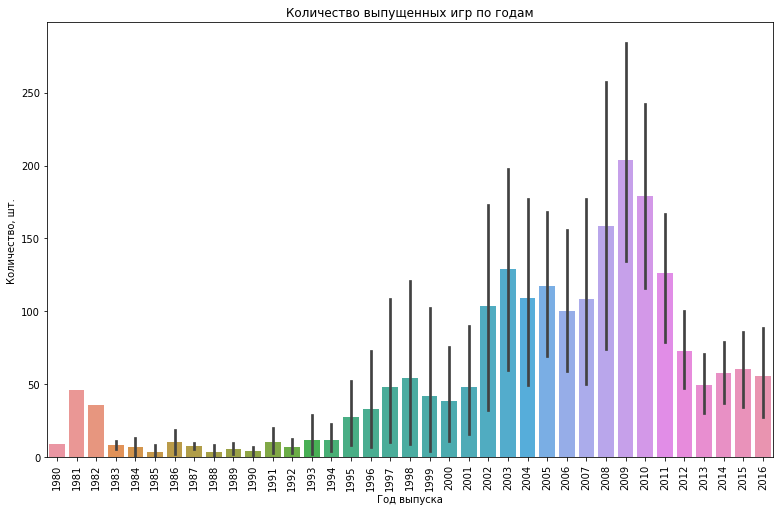

In [30]:
#построим столбчатый график для отображения количества выпущенных игр по годам

plt.figure(figsize=(13,8))
data_barplot = sns.barplot(x='year_of_release',y='number_of_games', #зададим параметры по осям
                           data = data_games_platforms_by_year)

plt.xlabel('Год выпуска'), #добавим подписи осей
plt.ylabel('Количество, шт.'),
plt.title('Количество выпущенных игр по годам') #добавим название графика
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х
                         
#выведем график на экран

plt.show()

Поскольку график не очень информативен и понятен, для простоты восприятия данных возьмем данные с момента значительного роста продаж видеоигр - с 2002 года по 2016 год и построим новый график.

In [31]:
#сделаем срез данных с 2002 по 2016 гг. Результат поместим в новый датасет data_games_2002_2016

data_games_2002_2016 = data_games_platforms_by_year.query('year_of_release >= 2002 and year_of_release <= 2016')

#выведем первые 10 строк датасета на экран

data_games_2002_2016.head(10)

,year_of_release,platform,number_of_games
107,2002,DC,1
108,2002,GBA,198
109,2002,GC,152
110,2002,N64,1
111,2002,PC,19
112,2002,PS,20
113,2002,PS2,280
114,2002,XB,158
115,2003,GBA,150
116,2003,GC,144


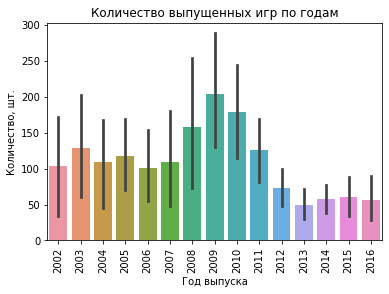

In [32]:
#построим столбчатый график для отображения количества выпущенных игр с 2002 по 2016 гг.

data_barplot = sns.barplot(x='year_of_release',y='number_of_games', #зададим параметры по осям
                           data = data_games_2002_2016) #укажем из какого датасета брать данные

plt.xlabel('Год выпуска'), #добавим подписи осей
plt.ylabel('Количество, шт.'),
plt.title('Количество выпущенных игр по годам') #добавим название графика
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х
                          
#выведем график на экран

plt.show()

Исходя из графика мы видим, что распределение количества выпущенных игр по годам нельзя назвать нормальным, поскольку колокол несимметричен и распределение не является унимодальным. Пик выпуска видеоигр приходится на период с 2008 по 2011 год, после чего количество выпущенных игр значительно снижается и поддерживается примерно на одном уровне (70-75 шт.) вплоть до 2016 г.

In [33]:
#сгруппируем данные по платформам. Посчитаем суммарные продажи в разрезе платформ и определим
#наиболее прибыльные из них. Результат сохраним в датасете sales_by_platform

sales_by_platform = data.groupby(['platform','year_of_release']).agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False).reset_index()

#выведем данные на экран

sales_by_platform.head(15)

,platform,year_of_release,total_sales
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32
5,X360,2010,170.03
6,PS,1998,169.49
7,PS2,2001,166.43
8,PS2,2005,160.66
9,PS3,2011,156.78


Исходя из данных мы видим, что первые 6 платформ являются лидерами по суммарным продажам видеоигр (1054.88 - 686.89 млн проданных копий). Начиная с платформы GBA суммарные продажи падают сразу в 2 раза до 306,4 млн копий.

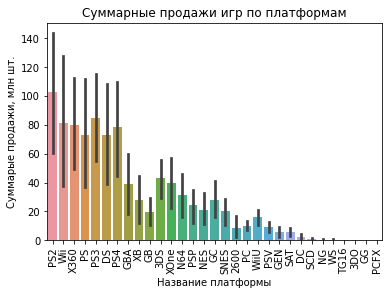

In [34]:
#построим столбчатый график распределения суммарных продаж по платформам

data_total_sales_platform= sns.barplot(x='platform',y='total_sales', #зададим параметры для осей
                                       data = sales_by_platform) #укажем необходимый датасет

plt.xlabel('Название платформы'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.title('Суммарные продажи игр по платформам') #добавим название графика
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х

#выведем график на экран

plt.show()

Исходя из данных графика видно, что есть 6 прибыльных и популярных платформ, однако большинство из них уже нет в продаже, поэтому изучим данные, начиная с 2013 года.

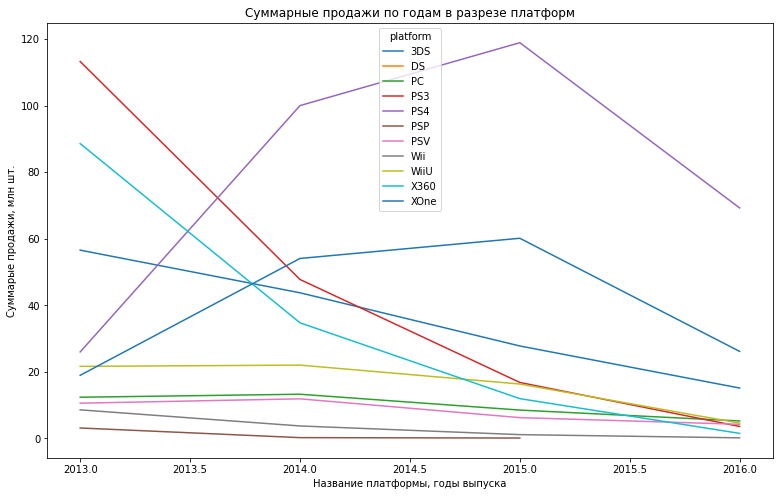

In [35]:
#сделаем срез данных, начиная с 2013 года

sales_by_platform = sales_by_platform.query('year_of_release >= 2013')

#построим график продаж по платформам, начиная с 2013 года

ax = sales_by_platform.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(figsize=(13, 8), title="Суммарные продажи по годам в разрезе платформ")

plt.xlabel('Название платформы, годы выпуска')
plt.ylabel('Суммарые продажи, млн шт.')

#выведем график на экран

plt.show()

Исхдя из данных графика видно, что часть продажа части платформ также идет на спад. В анализе будем использовать платформы нового поколения: PS4, XOne,PC, 3DS.

In [36]:
#добавим популярные платформы в список top_platforms

top_platforms = ['PS4', 'XOne','PC', '3DS']

In [37]:
#сделаем срез данных по топовым платформам. Результат сохраним в датасет sales_by_platform_grouped

sales_by_platform_grouped = data.query('platform in @top_platforms')

#выведем первые 10 строк датасета на экран

sales_by_platform_grouped.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,unknown,11.68
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01


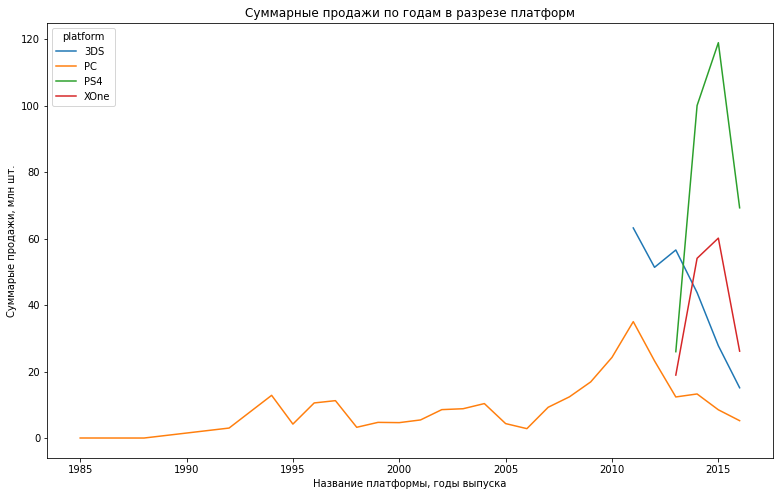

In [38]:
ax = sales_by_platform_grouped.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(figsize=(13, 8), title="Суммарные продажи по годам в разрезе платформ")

plt.xlabel('Название платформы, годы выпуска')
plt.ylabel('Суммарые продажи, млн шт.')

plt.show()

Проанализировав продажи по самым популярным продажам видно, что продажи игр на всех платформах пошли на резкий спад, начиная с 2013-2015 года, за исклюение РС, у которой наблюдается спад, но не такой резкий. Из графика также видно, что в среднем платформы находятся на пике популярности по 3-4 года. С этим вероятнее всего и связан спад продаж. Однако, необходимо рассчитать среднюю 'продолжительность жизни' платформы.

In [39]:
#рассчитаем среднюю продолжительность жизни платформы

platform_life_circle = (sales_by_platform_grouped.groupby('platform')['year_of_release']\
                        .max() - sales_by_platform_grouped.groupby('platform')['year_of_release']\
                        .min()).mean().round()

#выведем полученный результат на экран

platform_life_circle 

10.0

На мой взгляд, 13 лет - достаточно долго для жизни платформы, поэтому возьмем срок в 3 года, что в принципе и видно на линейном графике, построенном выше.

In [40]:
#сделаем срез для анализа с учетом года выпуска игр и самых популярных платформ. Результат сохраним
#в новом датасете sales_top_three_platforms

sales_top_platforms =  sales_by_platform_grouped\
                            .query('year_of_release >= 2013 and platform in @top_platforms')
    
#выведем первые 10 строк датасета на экран

sales_top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0.0,0.0,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,unknown,7.39


Для того, чтобы изучить суммарные продажи по трем популярным платформам, построим график "ящик с усами".

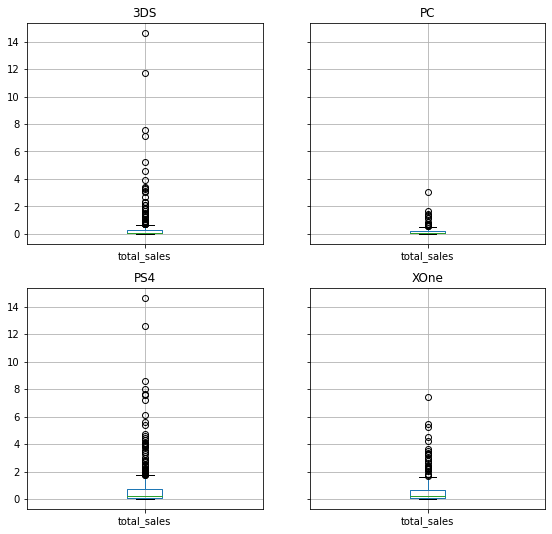

In [41]:
#построим график "ящик с усами" для трех популярных платформ

sales_top_platforms.groupby('platform').boxplot(column = 'total_sales', figsize = (9,9))

#выведем график на экран

plt.show()

In [42]:
# Комментарий ревьюера 2
data.year_of_release.min()

1980

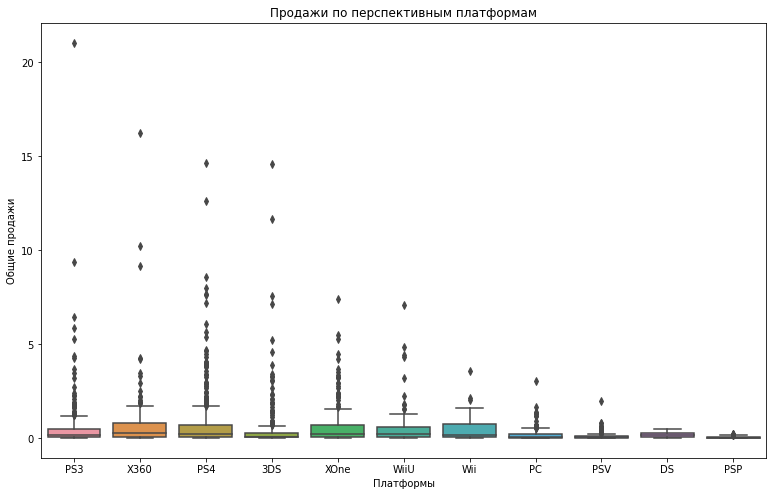

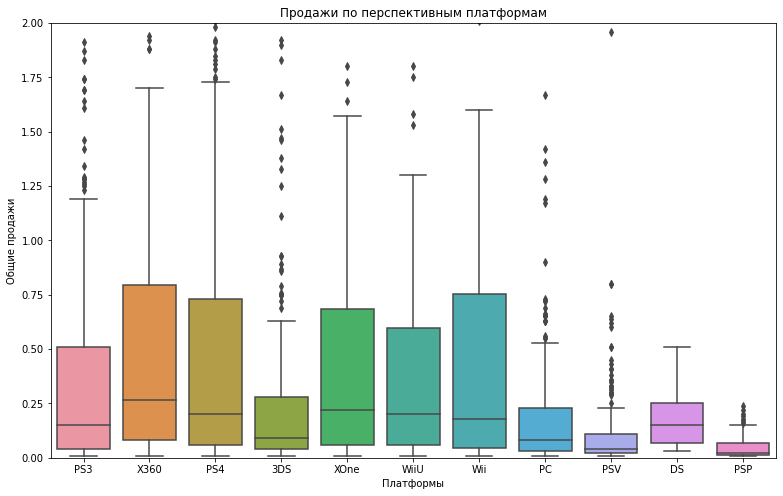

In [43]:
# Комментарий ревьюера 2
import seaborn as sns
data1, y = data[data.year_of_release >= 2013], 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data1, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data1, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

График "ящик с усами" получился визуально не очень понятный для восприятия, однако можно отметить, что в случае всех трех платформ существуют аномальные значения суммарных продаж, т.е. выбросы. Для того, чтобы лучше изучить данные, посмотрим описательные статистики.

In [44]:
#посмотрим характеристики сцммарных продаж по платформам

sales_top_platforms.groupby('platform')['total_sales'].describe().reset_index()

,platform,count,mean,std,min,25%,50%,75%,max
0,3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
1,PC,189.0,0.208624,0.352304,0.01,0.03,0.08,0.230,3.05
2,PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
3,XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


Как мы видим, среднее значение по суммарным продажам платформ 3DS,PS4,XOne примерно одинаковое (0,45, 0,67 и 0,59 млн копийй соответственно).Отличительной особенностью данных является показатель стандартного отклонения по платформам 3DS и PS4, который значительно превышает значение этого показателя по двум другим платформам (1,31 и 1,36 млн копий соответственно). Это говорит о том, что значения суммарных продаж по этим платформам имеют более широкий разброс. 

В ходе проведения исследования нам необходимо найти зависимость между отзывами пользователей и критиков и суммарными продажами видеоигр в разрезе платформ.

In [45]:
# Комментарий ревьюера
print(len(sales_top_platforms.query('platform == "PS4" and user_score !=0')))
print(len(sales_top_platforms.query('platform == "PS4" and critic_score !=0')))
print(len(sales_top_platforms.query('platform == "PS4" and user_score !=0 and critic_score !=0')))

257
252
249


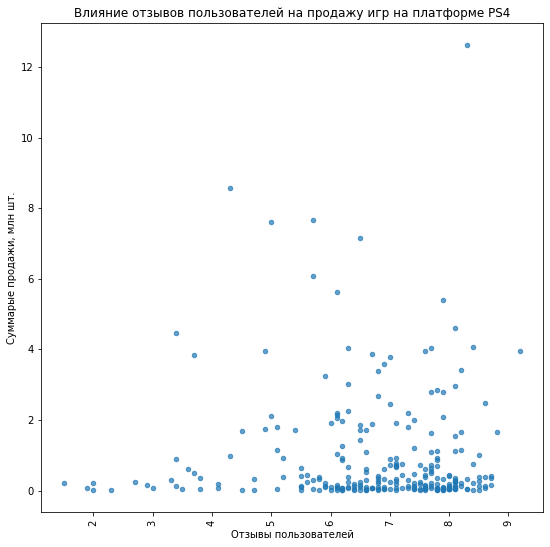

In [46]:
#сделаем срез данных по платформе PS4. Исключим нудевые оценки пользователей и критиков из среза

sales_ps4 = sales_top_platforms.query('platform == "PS4" and user_score !=0')

#построим диаграмму рассеяния зависимости отзывов пользователей на продажу игр на платформе PC

sales_ps4.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов пользователей на продажу игр на платформе PS4')
     


plt.xlabel('Отзывы пользователей'), #добавим полписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х

#выведем график на экран

plt.show()

In [47]:
# Комментарий ревьюера 2
'''🛠 Для анализа не используется актуальный период.'''
data.year_of_release.min()

1980

Из графика мы видим, что большинство значений суммарных продаж стремится к нулю. Корреляция между отзывами пользователей и продажами видеоигр слабая, однако это можно подтвердить рассчитав коэффициент корреляции. Стоит помнить о том, что у нас было большое количество пропущенных значений в столбце со значениями оценок пользователей, что также могло сказаться на результате анализа этого показателя. 

In [48]:
#посчитаем коэффициент корреляции между отзывами пользователей и суммарными продажами видеоигр на 
#платформе PS4

print('Коэффициент корреляции между отзывами пользователей и продажами игр на платформе PS4:',sales_ps4['total_sales'].corr(sales_ps4['user_score']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами игр на платформе PS4: -0.03


Как и следовало ожидать, корреляция между отзывами пользователей и суммарными продажами видеоигр на 
платформе PC слабая.

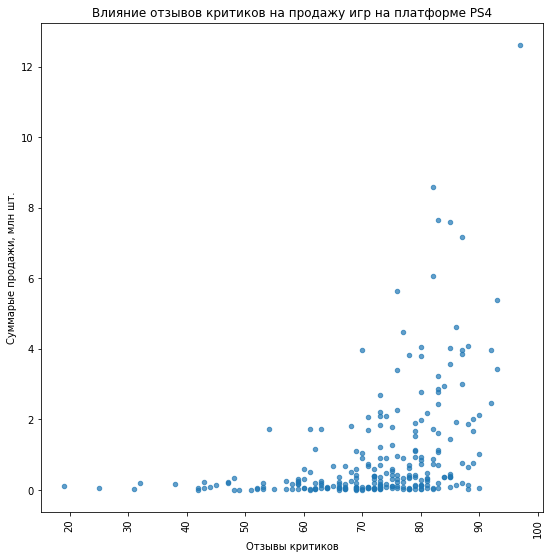

In [49]:
#построим диаграмму рассеяния зависимости отзывов критиков на продажу игр на платформе PS4

sales_ps4 = sales_top_platforms.query('platform == "PS4" and critic_score !=0')
sales_ps4.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', #зададим все необходимые параметры
                                       figsize=(9,9), alpha = 0.7, 
                                       title = 'Влияние отзывов критиков на продажу игр на платформе PS4')
     


plt.xlabel('Отзывы критиков'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона подписей по оси х

#выведем график на экран

plt.show()

Из графика видно, что ситуация с отзывами критиков аналогична той, что сложилась с отзывами пользователей: корреляция будет слабой. Посчитаем коэффициент корреляции.

In [50]:
#посчитаем коэффициент корреляции между отзывами критиков и суммарными продажами видеоигр на 
#платформе PS4

print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе PS4 с отфильтрованной заглушкой:',sales_ps4[
    sales_ps4.critic_score != 0]['total_sales'].corr(sales_ps4['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе PS4 с отфильтрованной заглушкой: 0.41


In [51]:
# Комментарий ревьюера 2
print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе PS4 с отфильтрованной заглушкой:',sales_ps4[
    sales_ps4.critic_score != 0]['total_sales'].corr(sales_ps4['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе PS4 с отфильтрованной заглушкой: 0.41


Как и ожидалось, взасимосвязь отзывов критиков и суммарных продаж на платформе PS4 слабая, но в отличии от корреляции суммарных продаж и отзывов пользователей, она положительная.
В ходе исследования необходимо проверить, как отзывы пользователей и критиков влияют на продажи видеоигр на других платформах, поскольку ситуация с продажами на платформе PS4 может быть исключительной.

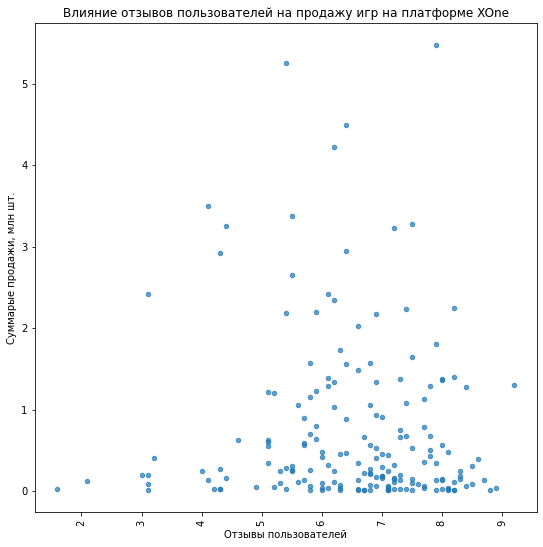

In [52]:
#сделаем срез данных по платфрме XOne. Исключим из анализа нулевые значения рейтингов

sales_xone = sales_top_platforms.query('platform == "XOne" and user_score !=0')

#построим диаграмму рассеяния зависимости отзывов пользователей на продажу игр на платформе XOne

sales_xone.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов пользователей на продажу игр на платформе XOne')
     


plt.xlabel('Отзывы пользователей'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона подписей на оси х

#выведем график на экран

plt.show()

In [53]:
#посчитаем коэффициент корреляции между отзывами пользователей и суммарными продажами видеоигр на 
#платформе XOne

print('Коэффициент корреляции между отзывами пользователей и продажами игр на платформе XOne:',sales_xone['total_sales'].corr(sales_xone['user_score']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами игр на платформе XOne: -0.07


Как мы видим из визуализированных данных и коэффициента корреляции, зависимость между отзывами пользователей и суммарными продажами видеоигр на платформе XOne ниже, чем на платформе PS4, но также отрицательна и составляет всего -0,09.

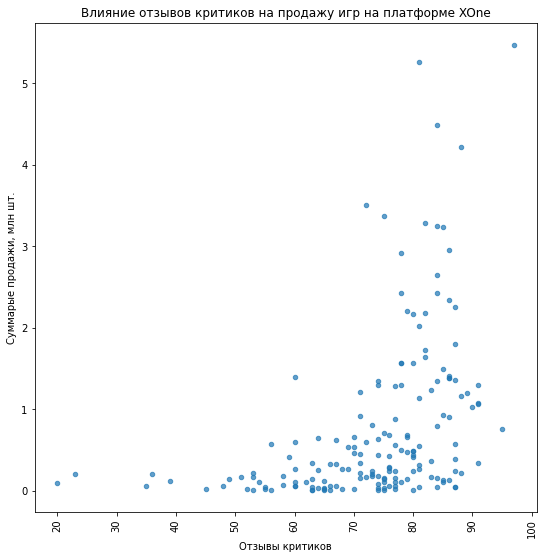

In [54]:
#построим диаграмму рассеяния зависимости отзывов критиков на продажу игр на платформе XOne

sales_xone = sales_top_platforms.query('platform == "XOne" and critic_score !=0')
sales_xone.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов критиков на продажу игр на платформе XOne')
     


plt.xlabel('Отзывы критиков'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона подписей на оси х

#выведем график на экран

plt.show()

In [55]:
#посчитаем коэффициент корреляции между отзывами критиков и суммарными продажами видеоигр на 
#платформе XOne

print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе XOne с отфильтрованной заглушкой:',sales_xone[
    sales_xone.critic_score != 0]['total_sales'].corr(sales_xone['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе XOne с отфильтрованной заглушкой: 0.42


Из данных графика и значения коэффициента корреляции видно, что зависимость отзывов критиков и суммарных продаж слабая.

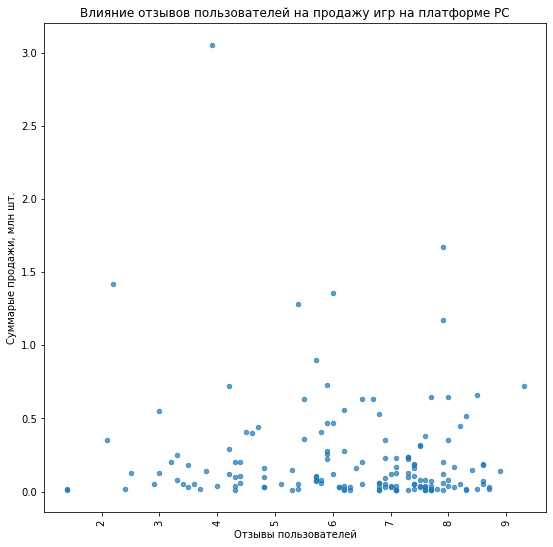

In [56]:
#сделаем срез данных по платфрме PC. Исключим нулевые значения рейтингов

sales_pc = sales_top_platforms.query('platform == "PC" and user_score !=0')

#построим диаграмму рассеяния зависимости отзывов пользователей на продажу игр на платформе PC

sales_pc.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов пользователей на продажу игр на платформе PC')
     


plt.xlabel('Отзывы пользователей'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона по оси х

#выведем график на экран

plt.show()

In [57]:
#посчитаем коэффициент корреляции между отзывами пользователей и суммарными продажами видеоигр на 
#платформе PC

print('Коэффициент корреляции между отзывами пользователей и продажами игр на платформе PC:',sales_pc['total_sales'].corr(sales_pc['user_score']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами игр на платформе PC: -0.09


Из данных графика и значения коэффициента корреляции видно, что зависимость отзывов пользователей и суммарных продаж слабая. Возможно, это связано с нелийненым характером зависимости.

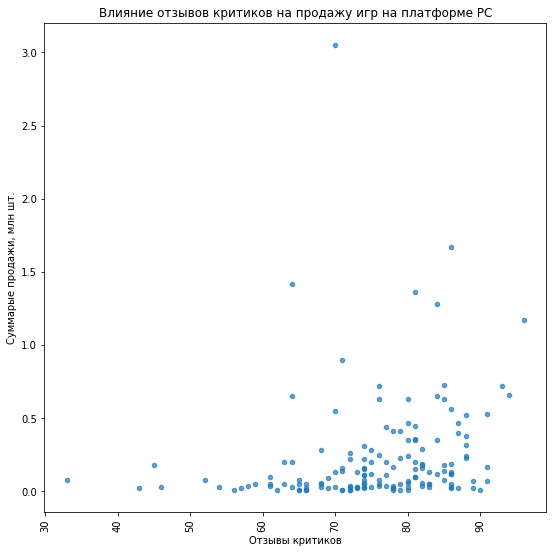

In [58]:
#построим диаграмму рассеяния зависимости отзывов критиков на продажу игр на платформе PC

sales_pc = sales_top_platforms.query('platform == "PC" and critic_score !=0')
sales_pc.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов критиков на продажу игр на платформе PC')
     


plt.xlabel('Отзывы критиков'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона по оси х

#выведем график на экран

plt.show()

In [59]:
#посчитаем коэффициент корреляции между отзывами критиков и суммарными продажами видеоигр на 
#платформе PC
print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе PC с отфильтрованной заглушкой:',sales_pc[
    sales_pc.critic_score != 0]['total_sales'].corr(sales_pc['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе PC с отфильтрованной заглушкой: 0.2


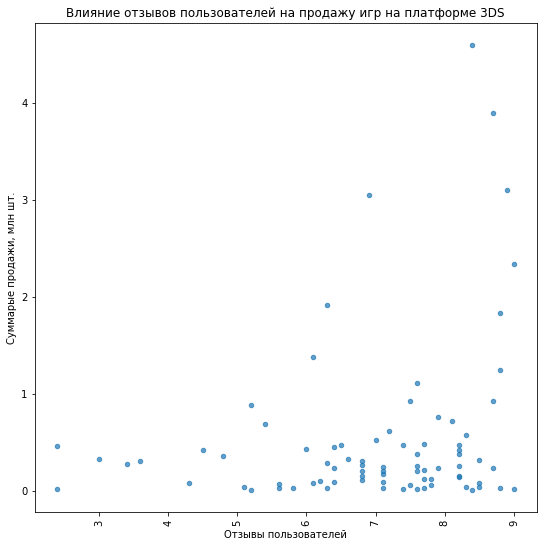

In [60]:
#сделаем срез данных по платфрме 3DS. Исключим нулевые значения рейтингов

sales_3ds = sales_top_platforms.query('platform == "3DS" and user_score !=0')

#построим диаграмму рассеяния зависимости отзывов пользователей на продажу игр на платформе PC

sales_3ds.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов пользователей на продажу игр на платформе 3DS')
     


plt.xlabel('Отзывы пользователей'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона по оси х

#выведем график на экран

plt.show()

In [61]:
#посчитаем коэффициент корреляции между отзывами пользователей и суммарными продажами видеоигр на 
#платформе 3DS

print('Коэффициент корреляции между отзывами пользователей и продажами игр на платформе 3DS:',sales_3ds['total_sales'].corr(sales_3ds['user_score']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами игр на платформе 3DS: 0.24


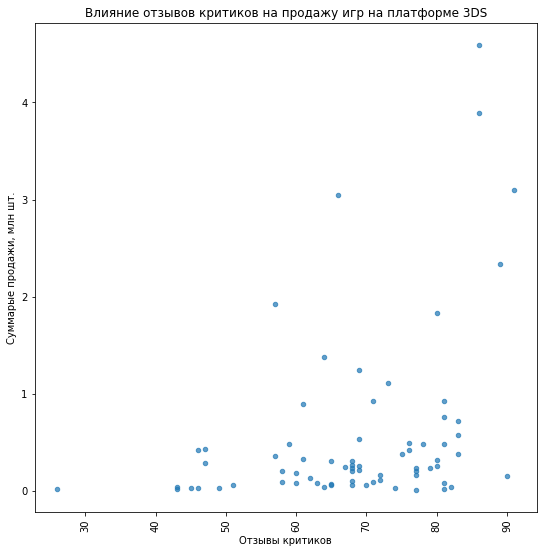

In [62]:
#построим диаграмму рассеяния зависимости отзывов критиков на продажу игр на платформе PC

sales_3ds = sales_top_platforms.query('platform == "3DS" and critic_score !=0')
sales_3ds.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize=(9,9), #зададим все необходимые параметры
          alpha = 0.7, title = 'Влияние отзывов критиков на продажу игр на платформе 3DS')
     


plt.xlabel('Отзывы критиков'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона по оси х

#выведем график на экран

plt.show()

In [63]:
#посчитаем коэффициент корреляции между отзывами критиков и суммарными продажами видеоигр на 
#платформе 3DS
print('Коэффициент корреляции между отзывами критиков и продажами игр на платформе 3DS с отфильтрованной заглушкой:',sales_3ds[
    sales_3ds.critic_score != 0]['total_sales'].corr(sales_3ds['critic_score']).round(2))

Коэффициент корреляции между отзывами критиков и продажами игр на платформе 3DS с отфильтрованной заглушкой: 0.36


Из данных графика и значения коэффициента корреляции видно, что зависимость отзывов критиков и суммарных продаж слабая. Возможно, это связано с нелийненым характером зависимости и для изучения взаимосвязи этих двух показателей необходимо использовать другие методы анализа.

В ходе анализа изучим зависимость жанров на суммарные продажи видеоигр.

In [64]:
# Комментарий ревьюера 2
'''🛠 Для анализа не используется актуальный период.'''
data.year_of_release.min()

1980

In [65]:
# Исправил
sales_top_platforms.year_of_release.min()

2013

In [66]:
#сгруппируем данные по суммарным продажам по жанрам, рассчитаем суммарные продажи по жанрам,
#отсортируем полученный показатель в порядке убывания и сохраним результат в датасет total_sales_by_genres

total_sales_by_genres = sales_top_platforms.groupby('genre')['total_sales']\
                        .agg(total_sales ='sum').sort_values(by='total_sales',\
                                                                ascending = False).reset_index()
#выведем датасет на экран

total_sales_by_genres

,genre,total_sales
0,Action,174.71
1,Shooter,158.79
2,Role-Playing,111.78
3,Sports,86.13
4,Misc,23.43
5,Racing,22.90
6,Simulation,19.56
7,Fighting,19.41
8,Platform,17.48
9,Adventure,12.86


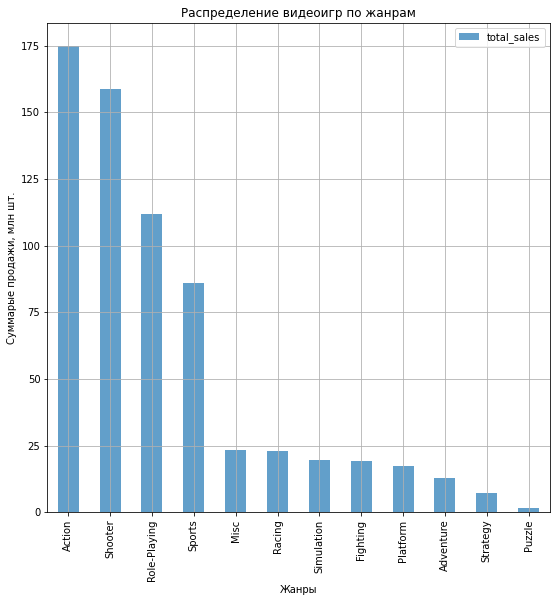

In [67]:
#построим график распределения суммарных продаж по жанрам

total_sales_by_genres.plot(kind = 'bar', x = 'genre', y = 'total_sales', grid = True, figsize=(9,9), 
          alpha = 0.7, title = 'Распределение видеоигр по жанрам') #зададим все необходимые параметры

plt.xlabel('Жанры'), #добавим подписи осей
plt.ylabel('Суммарые продажи, млн шт.'),
plt.xticks(rotation = 90) #добавим угол наклона значений по оси х

#выведем график на экран

plt.show()

In [68]:
da=data.groupby('genre')['total_sales'].agg([('total_sales', 'sum'),'median']).sort_values('total_sales', ascending=False).reset_index()
print(da.head(15))

           genre  total_sales  median
0         Action      1716.52    0.19
1         Sports      1309.67    0.22
2        Shooter      1041.36    0.24
3   Role-Playing       931.08    0.18
4       Platform       825.55    0.27
5           Misc       790.29    0.16
6         Racing       723.49    0.19
7       Fighting       442.66    0.21
8     Simulation       387.96    0.15
9         Puzzle       239.89    0.10
10     Adventure       233.33    0.05
11      Strategy       172.57    0.10


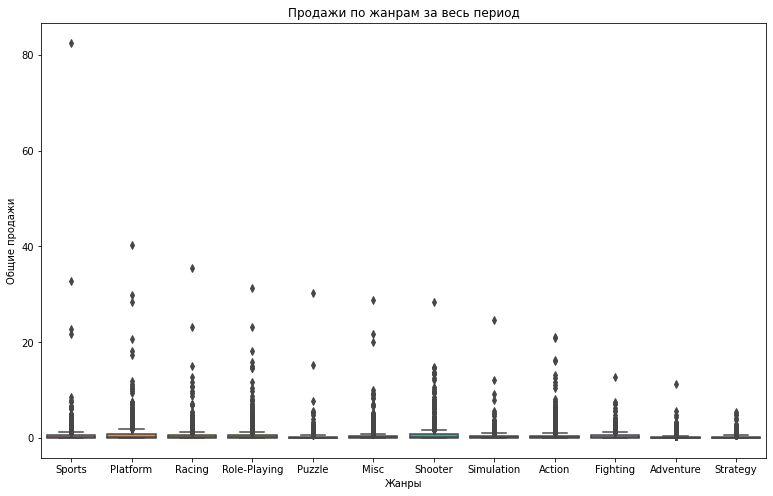

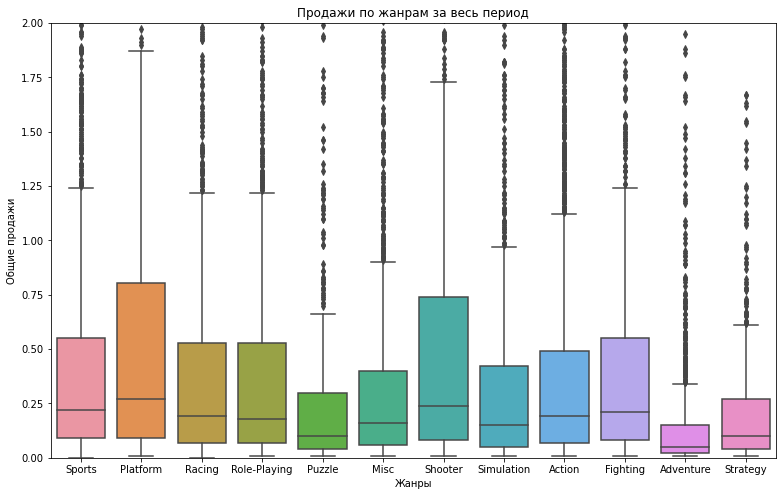

In [69]:
data1, y = data, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y='total_sales', x='genre')
    .set(title = 'Продажи по жанрам за весь период', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
data1, y = data, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y='total_sales', x='genre')
    .set(title = 'Продажи по жанрам за весь период', xlabel = 'Жанры', ylabel = 'Общие продажи',ylim=(0,2)))
plt.show()

In [70]:
da=data[data.year_of_release >=2013].groupby('genre')['total_sales'].agg([('total_sales', 'sum'),'median']).sort_values('total_sales', ascending=False).reset_index()
print(da.head(15))

           genre  total_sales  median
0         Action       321.87   0.110
1        Shooter       232.98   0.450
2         Sports       150.65   0.240
3   Role-Playing       145.89   0.125
4           Misc        62.82   0.100
5       Platform        42.63   0.225
6         Racing        39.89   0.120
7       Fighting        35.31   0.125
8      Adventure        23.64   0.030
9     Simulation        21.76   0.100
10      Strategy        10.08   0.080
11        Puzzle         3.17   0.060


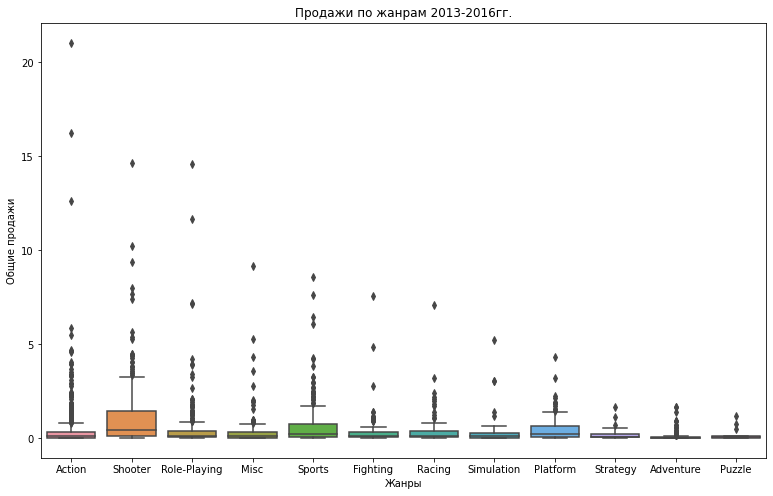

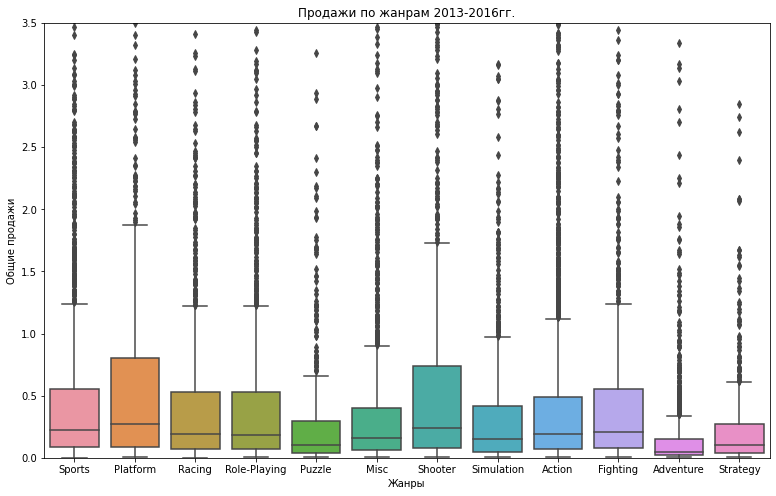

In [71]:
data1, y = data[data.year_of_release >=2013], 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data[data.year_of_release >=2013], y='total_sales', x='genre')
    .set(title = 'Продажи по жанрам 2013-2016гг.', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
data1, y = data[data.year_of_release >=2013], 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y='total_sales', x='genre')
    .set(title = 'Продажи по жанрам 2013-2016гг.', xlabel = 'Жанры', ylabel = 'Общие продажи',ylim=(0,3.5)))
plt.show()

Исходя из данных датасета и графика мы видим, что жанры влияют на продажи видеоигр. Самыми популярными за выбранный нами период являются: платформеры, спортивные игры, шутеры.

### Вывод

Изучив данные по суммарным продажам в разрезе платформ и года выпуска видеоигр можно сделать следующие выводы:

1. На данный момент есть всего 4 платформы, которые потенциально прибыльны и популярны: PS4, XOne,PC и 3DS. Остальные платформы изжили себя: объем продаж игр на них либо стремится к нулю, либо вовсе прекращен;

2. Средняя продолжительность "жизни" платформы - 3 года;

3. Ни оценки пользователей, ни оценки критиков не оказывают большого влияния на рост или падение продаж видеоигр, чего нельзя сказать о жанрах. Самыми прибыльными жанрами являются: платформеры, спортивные игры, шутеры.

## Составление портета пользователя каждого региона

Для выработки рекомендаций по повышению продаж видеоигр, необходимо составить некий "портрет" пользователя в зависимости от региона. Для начала изучим показатель суммарных продаж игр по регионам.

In [72]:
# Комментарий ревьюера 2
'''🛠 Для анализа не используется актуальный период.'''
data.year_of_release.min()

1980

### Самые популярные платформы в регионах (топ-5)

In [73]:
#создадим словарь top_5platf_dict данные по продажам топ-5 платформ в 3 регионах
top_5platf_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5platf_dict[region] = data[data.year_of_release >=2013].groupby('platform')[region].sum().sort_values(ascending=False).head(5)
top_5platf_dict

{'na_sales': platform
 PS4     108.74
 XOne     93.12
 X360     81.66
 PS3      63.50
 3DS      38.20
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     141.09
 PS3      67.81
 XOne     51.59
 X360     42.52
 3DS      30.96
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     67.81
 PS3     23.35
 PSV     18.59
 PS4     15.96
 WiiU    10.88
 Name: jp_sales, dtype: float64}

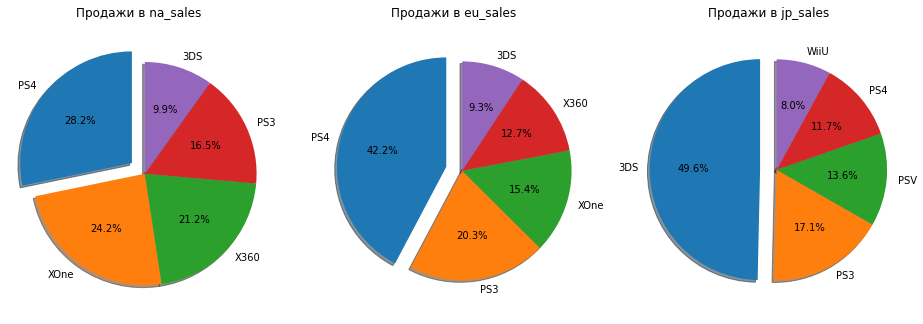

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top_5platf_dict[region[i]].index
    sizes = top_5platf_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

Из представленных данных видно, что в зависимости от региона, есть различия популярности платформ для игр, а именно:

- для Северной Америки характерна популярность платформ PS4 (108,74 млн проданных копий или 28,2% от всех проданных игр данного региона). Вторая по популярности платформа - XOne (93,12 млн проданных копий или 24,2% от всех проданных копий в этом регионе). Хороший результат у Х360. Наименее популярными платформами являются: PS3, 3DS . Это объясняется тем, что PS3 вышла изначально в Японии и получила меньшее распространение в США, DS - это французская разработка, которая не актуальна на данный момент (продажи не ведутся с 2013 г.)

- для Европы ситуация несколько похожа на ту, что сложилась в Северной Америке. самой  популярной платформой являются PS4 с более чем 2хкратным преимуществом 42,2% от всех проданных игр, но следом идет  PS3 20,3% от общих продаж игр. Наименее популярными платформами являются: XOne, Х360 и 3DS.

- для Японии ситуация в корне отличается. Самыми популярными являются платформы DS -49,6%. Возможно влияние на такую популярностью относительно старых платформ оказывает консервативность японцев (считают старые платформы лучше новых версий), то, что платформа DS получила распространение в Японии позже, чем в Европе, а также, возможно, имеет значение предпочитаемые жанры игр, что мы проверим дальше. 

### Самые популярные жанры в регионах (топ-5)

In [75]:
#Запишем в словарь top_5platf_dict данные по продажам топ-5 платформ в 3 регионах
top_5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5genre_dict[region] = data[data.year_of_release >=2013].groupby('genre')[region].sum().sort_values(ascending=False).head(5)
top_5genre_dict

{'na_sales': genre
 Action          126.05
 Shooter         109.74
 Sports           65.27
 Role-Playing     46.40
 Misc             27.49
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          118.13
 Shooter          87.86
 Sports           60.52
 Role-Playing     36.97
 Racing           20.19
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    51.04
 Action          40.49
 Misc             9.20
 Fighting         7.65
 Shooter          6.61
 Name: jp_sales, dtype: float64}

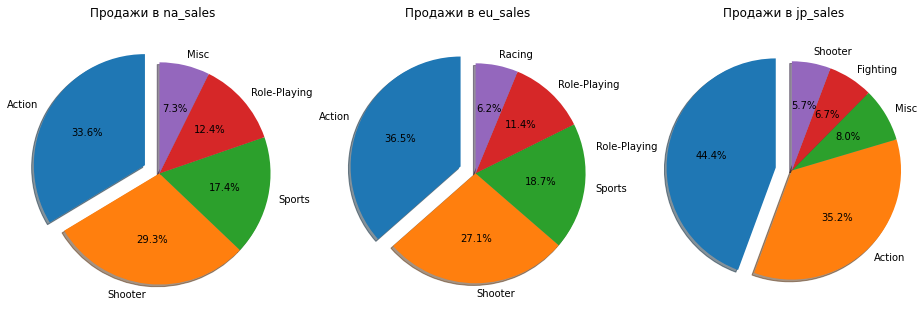

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top_5genre_dict[region[i]].index
    sizes = top_5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные могут только дополнять анализ. У нас этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Сделаем? Примерно вот так:</font>
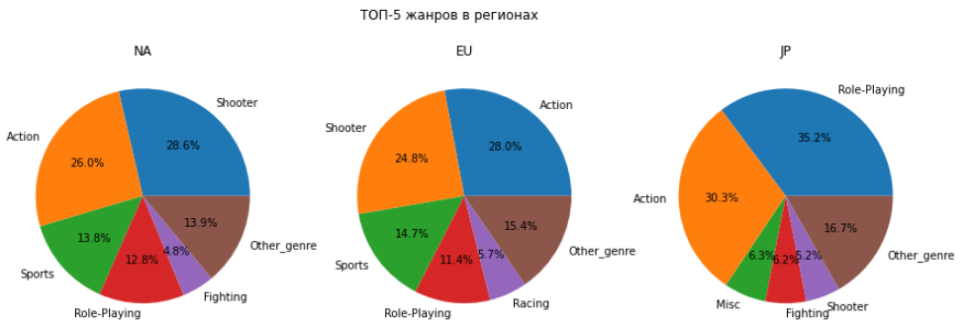

Исходя из полученных данных видно, что существуют различия в жанровых предпочтениях пользователей по регионам:

1. В Америке самыми популярными жанрами являются: экшн, спортивные игры, шутеры, role-play и Misc.

2. В Европе топ-5 жанров похожи: экшн, спорт,шутеры,гонки и role-play.

3. Предпочтения у японцев несколько отличаются и топ-5 составляют: ролевые игры, экшн, Misc, файтинги и шутеры.

Вероятнее всего, жанровые предпочтения зависят от культурных аспектов жизни и взглядов американцев, европейцев и японцев.

In [77]:
# Комментарий ревьюера 2
'''🛠 Для анализа не используется актуальный период.'''
data.year_of_release.min()

1980

### Влияние рейтинга ESRB на продажи в отдельных регионах

In [78]:
esrb_sale = data[data.year_of_release >=2013].groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', \
                                                                                                                      ascending=False).reset_index()

/tmp/ipykernel_386/1092211581.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb_sale = data[data.year_of_release >=2013].groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', \


In [79]:
esrb_sale

,rating,na_sales,eu_sales,jp_sales
0,M,165.21,145.32,14.11
1,unknown,89.42,78.91,85.05
2,E,79.05,83.36,15.14
3,E10+,54.24,42.69,5.89
4,T,49.79,41.95,20.59


Изучив данные о влиянии рейтинга ESRB можно сделать следующие выводы:

- на продажи игр в Америке рейтинг возможно влияет.Не малую долю составляют игры M- рейтинга. Но для полного заключения  мы не знаем значения рейтинга 89.42 млн проданных копий игр. 

- такая же ситуация с вилиянием рейтинга на продажи игр в Европе. Не малую долю составляют игры M- рейтинга.

- по пользователям Японии также невозможно сделать вывод о влиянии рейтинга из-за того, что большая часть данных неизвестна.

### Вывод

Изучив поведение пользователей по регионам можно сказать следующее:
    
- "портрет" пользователя из Северной Америки выглядит так: пользователь любого возраста или взрослый, предпочитающий игры в жанре экшн, спортивные игры, шутеры, role-play и Misc на платформах PS4 и XOne.

- "портрет" пользователя из Европы - это  пользователь любого возраста или взрослый, предпочитающий игры в жанре экшн, спорт,шутеры,гонки и role-play на платформах PS4 или PS3.

- "портрет" пользователя из Японии: пользователь любого возраста, предпочитающий игры в жанре ролевые игры, экшн, Misc, файтинги и шутеры на платформах DS или PS3.

## Проверка гипотез

В ходе проведения исследования необходимо проверить две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки первой гипотезы сформулируем нулевую и альтернативную гипотезы:

Н0: средние пользовательские рейтинги платформ XOne и PC равны.

Н1: средние пользовательские рейтинги платформ XOne и PC не равны.

Поскольку у нас представлены две независимые выборки данных, то будем использовать метод t-теста Стьюдента, который вернет нам разницу распределения значений средних показателей двух независимых выборок.

Поскольку есть принятые допустимые уровни статистической значимости (5% и 1%), то выберем один из них, например, 5%.

In [80]:
# Комментарий ревьюера 2
'''🛠 Для анализа не используется актуальный период.'''
data.year_of_release.min()

1980

In [81]:
#сформируем первую выбору по платформе XOne

sample_1 = data[data.year_of_release >=2013].query('platform == "XOne"and user_score !=0')

#выведем первые 10 строк датасета на экран

sample_1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
372,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
396,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,3.37
411,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
415,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
420,Halo: The Master Chief Collection,XOne,2014,Shooter,1.91,1.00,0.03,0.29,85.0,7.2,M,3.23
480,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,86.0,6.4,M,2.95


In [82]:
# Комментарий ревьюера 2
data.query('platform == "XOne"and user_score !=0').user_score

165      7.9
179      5.4
241      6.4
269      6.2
372      4.1
        ... 
16273    6.8
16326    6.0
16359    8.2
16372    6.6
16389    6.7
Name: user_score, Length: 182, dtype: float64

In [83]:
#сформируем первую выбору по платформе PC

sample_2 = data[data.year_of_release >=2013].query('platform == "PC" and user_score !=0')

#выведем первые 10 строк датасета на экран

sample_2.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
455,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1084,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
1337,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
1423,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
1515,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1710,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2273,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
2746,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85.0,5.9,M,0.73
2791,Total War: Rome II,PC,2013,Strategy,0.12,0.53,0.0,0.07,76.0,4.2,T,0.72
2812,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,0.21,0.46,0.0,0.05,93.0,9.3,M,0.72


In [84]:
#зададим уровень статистической значимости

alpha = .05

In [85]:
#проведем проверку первой гипотезы, используя метод st.ttest_ind. В качестве аргументов передадим
#данные выборок, распределение значений которых необходимо изучить

results = st.ttest_ind(
    sample_1['user_score'],
    sample_2['user_score']
)

print('p-значение:', results.pvalue) #выводим на экран значение p-value

if (results.pvalue < alpha): #сравниваем значение p-value  заданный уровень статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средний пользовательский рейтинг платформы XOne:', sample_1['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC:', sample_2['user_score'].mean())

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу

Средний пользовательский рейтинг платформы XOne: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.2696774193548395


Как мы видим, средние пользовательские рейтинги по платформам не равны, поэтом есть основания отвергнуть нулевую гипотезу.

Сформулируем нулевую и альтернативную гипотезы для проверки второй гипотезы: 

Н0: средние пользовательские рейтинги жанров Action и Sports равны.

Н1: средние пользовательские рейтинги жанров Action и Sports не равны.

In [86]:
# Комментарий ревьюера 2
'''🛠 Для анализа не используется актуальный период.'''
data.year_of_release.min()

1980

In [87]:
#сделаем срез данных по жанру Action

sample_1 = data[data.year_of_release >=2013].query('genre == "Action" and user_score !=0')

#выведем первые 10 строк датасета на экран

sample_1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
230,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
234,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
294,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
303,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
304,Batman: Arkham Knight,PS4,2015,Action,1.53,1.69,0.10,0.64,87.0,7.6,M,3.96


In [88]:
#сделаем срез данных по жанру Sports

sample_2 = data[data.year_of_release >=2013].query('genre == "Sports" and user_score !=0')

#выведем первые 10 строк датасета на экран

sample_2.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
263,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,0.0,4.5,E,4.28
270,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
313,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
415,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
418,Madden NFL 16,PS4,2015,Sports,2.34,0.30,0.00,0.60,83.0,5.9,E,3.24
466,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01


In [89]:
#проведем проверку первой гипотезы, используя метод st.ttest_ind. В качестве аргументов передадим
#данные выборок, распределение значений которых необходимо изучить

results = st.ttest_ind(
    sample_1['user_score'],
    sample_2['user_score']
)

print('p-значение:', results.pvalue) #выводим на экран значение p-value

if (results.pvalue < alpha): #сравниваем значение p-value  заданный уровень статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средний пользовательский рейтинг игр жанра Action:', sample_1['user_score'].mean())
print('Средний пользовательский рейтинг игр жанра Sports:', sample_2['user_score'].mean())

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг игр жанра Action: 6.837532133676092
Средний пользовательский рейтинг игр жанра Sports: 5.238124999999999


Как мы видим, пользовательские рейтинги жанров Action и Sports не равны, поэтому отвергаем нулевую гипотезу.

## Общий вывод

При планировании бюджета рекламных кампаний, а также развития продаж тех или иных игр необходимо учитывать следующие факторы, оказывающие наибольшее влияние на суммарные продажи видеоигр:

1. Жанр игр;
2. Платформу;
3. Регион проживания пользователя.

Исходя из трех этих факторов можно составить характеристику пользователя по регионам:

- пользователь из Северной Америки -  любого возраста или взрослый, предпочитающий игры в жанре экшн, спортивные игры, шутеры, role-play и Misc на платформах PS4 и XOne.

- "портрет" пользователя из Европы - это  пользователь ллюбого возраста или взрослый, предпочитающий игры в жанре экшн, спорт,шутеры,гонки и role-play на платформах PS4 или PS3.

- Японский пользователь: пользователь любого возраста, предпочитающий игры в жанре ролевые игры, экшн, Misc, файтинги и шутеры на платформах DS или PS3.

Большая часть продаж приходилась на период до 2013 года, но по характеру используемых платформ можно сделать вывод о том, что стоит развивать выпускать новые платформы - последователи PS. Также стоит учитывать среднюю продолжительность "жизни" платформы - 3 года, затем необходимо совершенствовать платформу и выпускать новые игры. В первую очередь стоит обратить внимание на развитие продаж в Северной Америке и Европе, поскольку это большая часть рынка продаж видеоигр. Япония довольна специфична в предпочтениях, что обусловлено культурными взглядами ее жителей.

Такие факторы как оценки пользователей или критиков не оказывают существенного влияния на рост продаж видеоигр.